### EDA on Student Performance data: Target-> Test Score

Data Source: kaggle dataset Student Performance Data
             1000 Rows, 8 Columns

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
import warnings

warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv("./data/StudentsPerformance.csv")

data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Handling Missing Values

In [ ]:
data.isna().any()          #.isna() <=> .isnull
# data.isna().sum()

#No Null Data -> Excellent

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### Handling Duplicates

In [15]:
data.duplicated().sum()      #.drop_duplicates() for dropping duplicates

# No Duplicate values         

np.int64(0)

#### Obtaining Numerical, Categorical Columns

In [17]:
numerical = [cat for cat in data.columns if data[cat].dtype!='O']
categorical = [cat for cat in data.columns if data[cat].dtype=='O']

print(f"{len(numerical)} Numerical Features {numerical}")
print(f"{len(categorical)} Categorical Features {categorical}")

3 Numerical Features ['math score', 'reading score', 'writing score']
5 Categorical Features ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


### Exploratory Analysis

In [18]:
#Creating total score, Average score

data['total score'] = data['math score'] + data['writing score'] + data['reading score']
data['average'] = data['total score']/3

data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [ ]:
# Checking full scorers:
# math_full = data[data['math score']==100].count()          #DataFrame.count() => Each column count

math_full = data[data['math score']==100]['average'].count()
writing_full = data[data['writing score']==100]['average'].count()
reading_full = data[data['reading score']==100]['average'].count()

print(f"{math_full} Students with full score in maths")
print(f"{reading_full} Students with full score in reading")
print(f"{writing_full} Students with full score in writing")

#Best Score in Reading. Might be easiest subject

7 Students with full score in maths
17 Students with full score in reading
14 Students with full score in writing


### Data Visualizations

[]

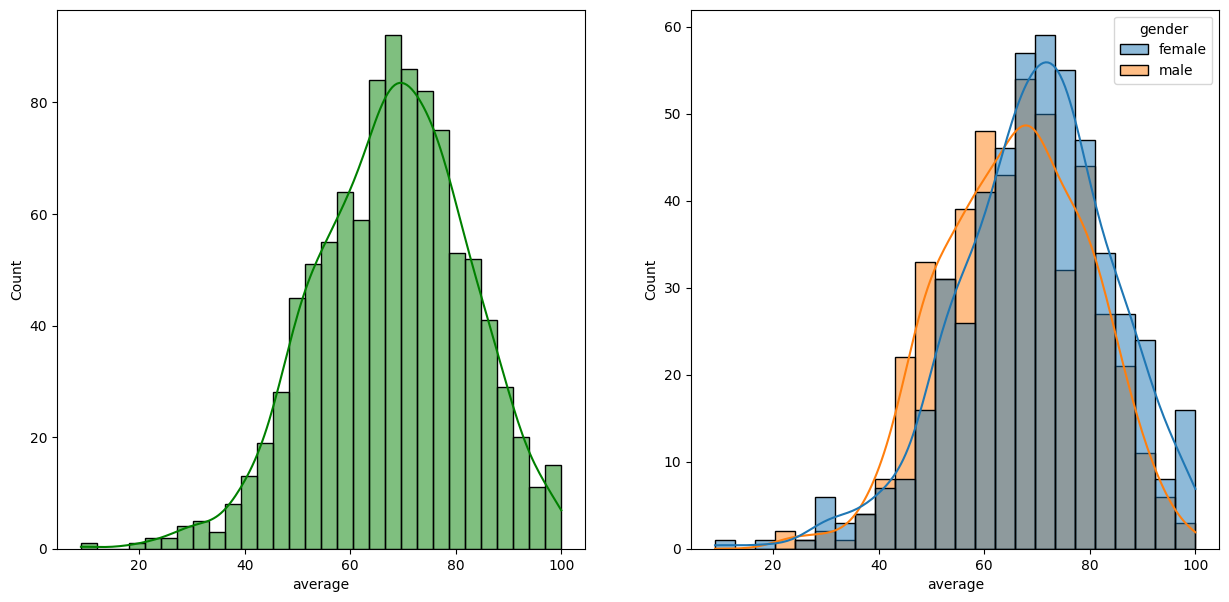

In [ ]:
# Histogram and KDE

fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
snb.histplot(data=data, x='average',bins=30, kde=True, color='g')

plt.subplot(122)
snb.histplot(data=data, x='average', kde=True, hue='gender')           #hue for gender based distribution

plt.plot()

# Avg score of all groups: 60-80
# Top scorers in average as well as highest scores are females: Ofc!!

<Axes: xlabel='average', ylabel='Count'>

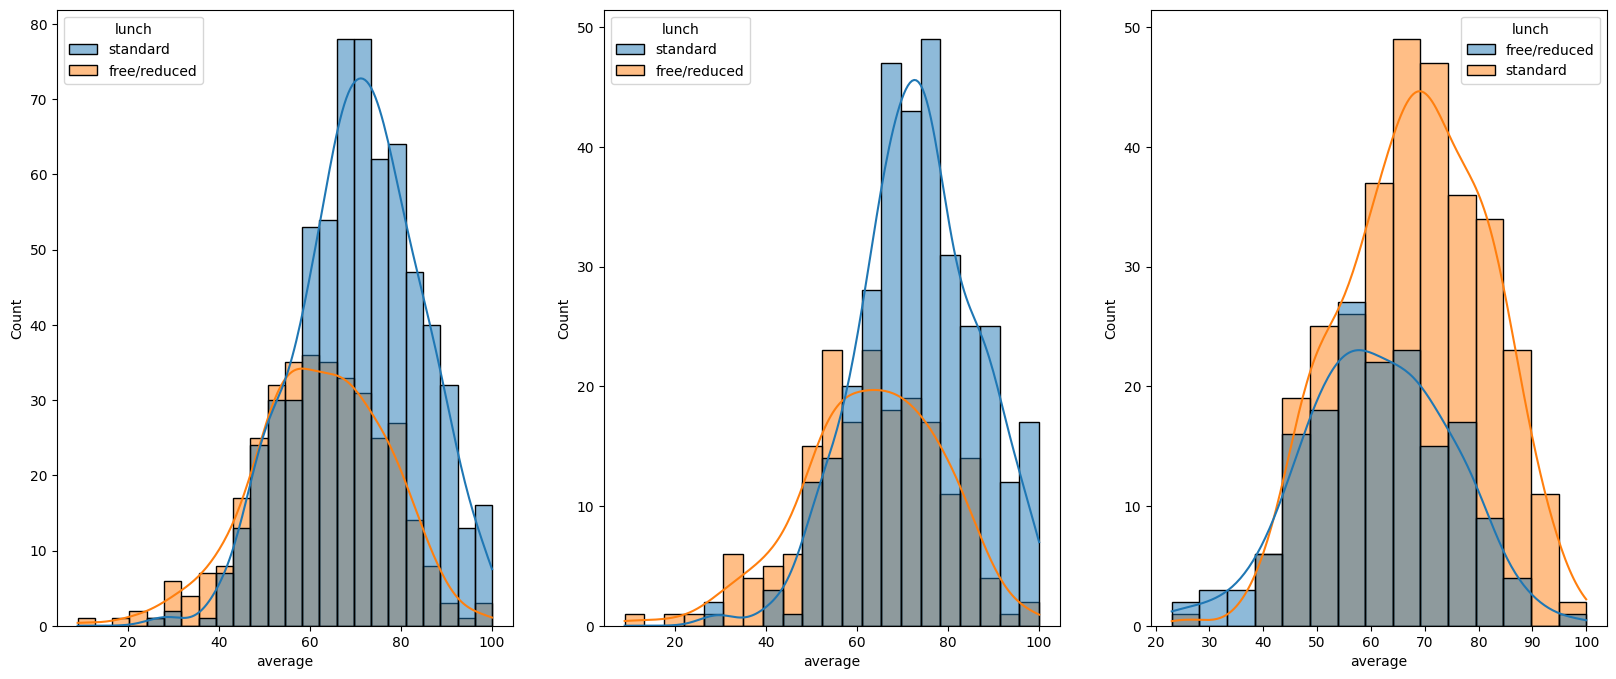

In [ ]:
# Lunch Factor

plt.subplots(1, 3, figsize=(20,8))

plt.subplot(131)
snb.histplot(data=data, x='average', kde=True, hue='lunch')
plt.plot()

#Gender based
plt.subplot(132)
snb.histplot(data=data[data['gender']=='female'], x='average', kde=True, hue='lunch')

plt.subplot(133)
snb.histplot(data=data[data['gender']=='male'], x='average', kde=True, hue='lunch')


#Standard Lunch by Students increases their score!!

[]

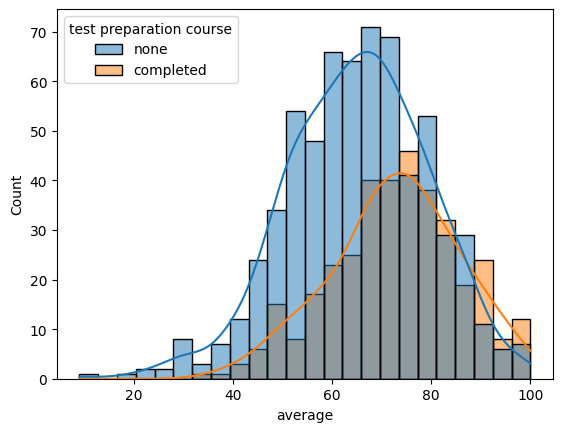

In [ ]:
# External Course Factor
snb.histplot(data=data, x='average', kde=True, hue='test preparation course')
plt.plot()

# Most students didn't complete Course. High Scorers completed Course